In [5]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display

## 0. 파라미터 <a name="parameters"></a>

In [6]:
#NUM_CLASSES = 10

## 1. 데이터 준비 <a name="prepare"></a>

In [7]:
(x_train, y_train), (x_test, y_test) = datasets.boston_housing.load_data()

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [9]:
type(x_train)

numpy.ndarray

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

## 2. 모델 구축 <a name="build"></a>

In [32]:
input_layer = layers.Input((13)) 

x = layers.Dense(200, activation="relu")(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dense(150, activation="relu")(x)
x = layers.BatchNormalization()(x)

output_layer = layers.Dense(1)(x)

model1 = models.Model(input_layer, output_layer)

model1.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_45 (Dense)            (None, 200)               2800      
                                                                 
 batch_normalization_36 (Ba  (None, 200)               800       
 tchNormalization)                                               
                                                                 
 dense_46 (Dense)            (None, 150)               30150     
                                                                 
 batch_normalization_37 (Ba  (None, 150)               600       
 tchNormalization)                                               
                                                                 
 dense_47 (Dense)            (None, 1)                 151

## 3. 모델 훈련 <a name="train"></a>

In [38]:
opt = optimizers.Adam(learning_rate=0.0005)
model1.compile(
    loss="mae", optimizer=opt, metrics=["mape"]
)

In [64]:
model1.fit(x_train, y_train, batch_size=32, epochs=50, verbose=0,shuffle=True)

## 4. 평가 <a name="evaluate"></a>

In [65]:
model1.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 3.2178 - mape: 15.5070


[3.217785358428955, 15.507000923156738]

In [66]:
preds = model1.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [67]:
# preds, y_test

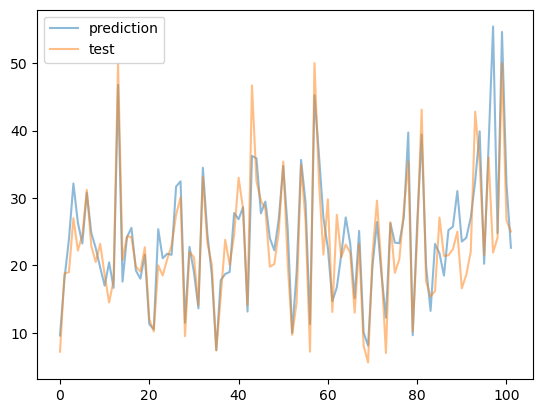

In [68]:
x = np.arange(0, len(preds))
plt.plot(x, preds, label='prediction', alpha=0.5)
plt.plot(x, y_test, label='test', alpha=0.5)
plt.legend()